## K-mean++ 

### Imports

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [16]:
dataset = pd.read_csv('Mall_Customers.csv')
# In order to visualize the result we need two dimensions (income, spending score)
X = dataset.iloc[:, [3, 4]].values 

### Using the dendrogram to find the optimal number of clusters

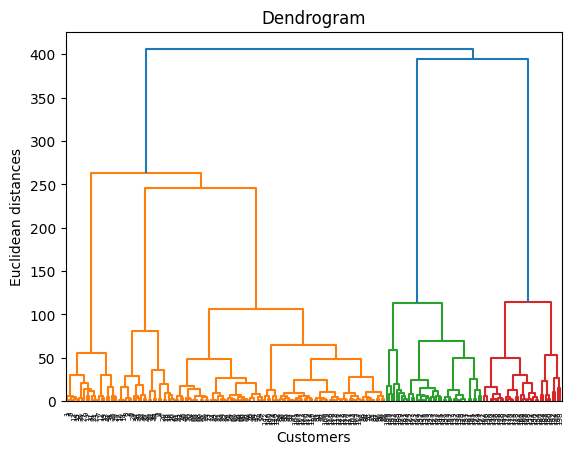

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Training the Hierarchical Clustering model on the dataset

In [18]:
from sklearn.cluster import AgglomerativeClustering

# We use n_clusters=3 according to the plot above
clusters = 3
hc = AgglomerativeClustering(n_clusters = clusters, linkage = 'ward')
y_hc = hc.fit_predict(X) # Contains cluster index for each customer

### Visualizing the clusters

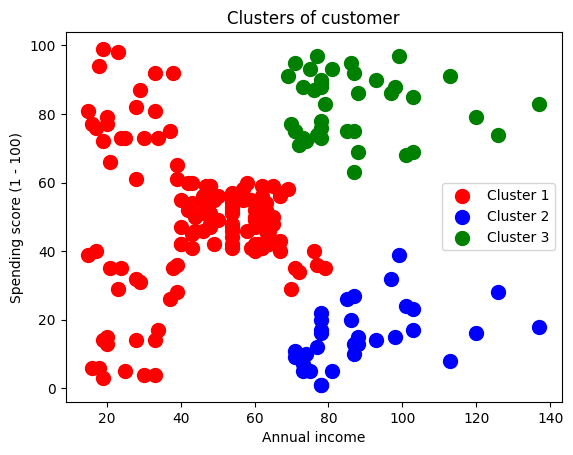

In [19]:
colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'cyan',
    4: 'magenta'
}
for i in range(0, clusters):
    plt.scatter(X[y_hc == i, 0], 
                X[y_hc == i, 1], 
                s=100, c=colors.get(i), label='Cluster {}'.format(i + 1))
plt.xlabel('Annual income'),
plt.ylabel('Spending score (1 - 100)')
plt.title('Clusters of customer'),
plt.legend()
plt.show()